In [23]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.tools.visualization import plot_histogram

In [9]:
qc = QuantumCircuit(6,6)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(5)
qc.cx(2,4)
qc.measure([0,1,2,3,4,5],[0,1,2,3,4,5])

In [10]:
qc.draw()

┌───┐     ┌─┐            
q_0: ┤ H ├─────┤M├────────────
     ├───┤     └╥┘┌─┐         
q_1: ┤ H ├──────╫─┤M├─────────
     ├───┤      ║ └╥┘   ┌─┐   
q_2: ┤ H ├──■───╫──╫────┤M├───
     ├───┤  │   ║  ║ ┌─┐└╥┘   
q_3: ┤ H ├──┼───╫──╫─┤M├─╫────
     └───┘┌─┴─┐ ║  ║ └╥┘ ║ ┌─┐
q_4: ─────┤ X ├─╫──╫──╫──╫─┤M├
     ┌───┐└┬─┬┘ ║  ║  ║  ║ └╥┘
q_5: ┤ H ├─┤M├──╫──╫──╫──╫──╫─
     └───┘ └╥┘  ║  ║  ║  ║  ║ 
c: 6/═══════╩═══╩══╩══╩══╩══╩═
            5   0  1  3  2  4

In [15]:
num_shots = 100
simulator = qiskit.providers.aer.QasmSimulator()
executed_job = qiskit.execute(qc, simulator, shots=num_shots)
job_result = executed_job.result()
counts = job_result.get_counts(qc)
print(counts)
print(len(counts))

{'000001': 1, '010100': 1, '010101': 9, '010110': 5, '010111': 6, '011100': 4, '011101': 4, '011110': 6, '011111': 3, '000010': 3, '100000': 3, '100001': 3, '100010': 3, '100011': 3, '101000': 4, '101001': 4, '101010': 4, '101011': 4, '000011': 2, '110101': 1, '110110': 1, '110111': 5, '111100': 2, '111101': 3, '111110': 1, '111111': 3, '001000': 4, '001001': 2, '001010': 1, '001011': 5}
30


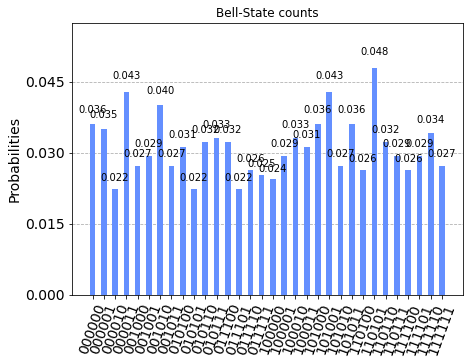

In [12]:
plot_histogram(counts, title='Bell-State counts')

In [16]:
def find_entangled_pair(counts):
    key_length = len(list(counts.keys())[0])
    print("key length", key_length)
    index_not_entangled = set()
    for bitstring in counts:
        # this is not in an entangled qubit
        if bitstring.count("1") == 1:
            index_not_entangled.add(key_length - 1 - bitstring.find("1"))            
    entangled_qubits = list()
    for i in range(key_length):        
        if i not in index_not_entangled:
            entangled_qubits.append(i)
    print(entangled_qubits)
    
    if len(entangled_qubits) >= 2:
        qubit_1 = entangled_qubits[0]
        qubit_2 = entangled_qubits[1]
    else:
        qubit_1, qubit_2 = None, None
        
    return qubit_1, qubit_2

In [17]:
find_entangled_pair(counts)

key length 6
[2, 4]


In [ ]:
import qiskit

def find_entangled_pair(counts):
    bitstring_length = len(list(counts.keys())[0])
    not_entangled_qubits = set()
    for bitstring in counts:
        # this qubit is not entangled
        if bitstring.count("1") == 1:
            not_entangled_qubits.add(bitstring_length - 1 - bitstring.find("1"))            
    entangled_qubits = list()
    for i in range(bitstring_length):        
        if i not in not_entangled_qubits:
            entangled_qubits.append(i)    
    if len(entangled_qubits) >= 2:
        qubit_1 = entangled_qubits[0]
        qubit_2 = entangled_qubits[1]
    else:
        qubit_1, qubit_2 = None, None
        
    return qubit_1, qubit_2

def hw3_2_response(circuit):
    circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
    num_shots = 1024
    simulator = qiskit.providers.aer.QasmSimulator()
    executed_job = qiskit.execute(circuit, simulator, shots=num_shots)
    job_result = executed_job.result()
    counts = job_result.get_counts(circuit)

    qubit_1, qubit_2 = find_entangled_pair(counts)

    return qubit_1, qubit_2

In [18]:
qc.num_qubits

6

In [19]:
qc.num_clbits

6

In [20]:
def prime_circuit(circuit, qubit_list, bitstring):
    for qubit in qubit_list:
        circuit.initialize(bitstring, qubit_list)
    return circuit    

In [26]:
qr = QuantumRegister(6)
cr = ClassicalRegister(6)
qc = QuantumCircuit(qr,cr)
qc.measure(qr, cr)

In [ ]:
qc.measure_all()
execute(qc, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()

In [27]:
num_shots = 1
simulator = qiskit.providers.aer.QasmSimulator()
executed_job = qiskit.execute(qc, simulator, shots=num_shots)
job_result = executed_job.result()
counts = job_result.get_counts(qc)
print(counts)

{'000000': 1}


In [28]:
pqc = prime_circuit(qc,[0,1,2,3,4,5],"100000")
pqc.measure(qr, cr)

QiskitError: 'Desired statevector length not a positive power of 2.'

In [ ]:
qc.measure_all()
execute(qc, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()

In [ ]:
num_shots = 1
simulator = qiskit.providers.aer.QasmSimulator()
executed_job = qiskit.execute(qc, simulator, shots=num_shots)
job_result = executed_job.result()
counts = job_result.get_counts(qc)
print(counts)